In [42]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os
import random
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive')


Mounted at /content/drive


In [43]:
!ls /content/drive/MyDrive

"1990's.gdoc"
 2022.pdf
'4) transcript of interview and intervieew’s notes.gdoc'
 a_enoyer
"agent d'entretient.gdoc"
'aide à domicile.gdoc'
 ALMA_ATAL_ORO_CV.gdoc
 ALMA.gdoc
'alma v2.gdoc'
 ATAL.gdoc
'atal v2.gdoc'
'Attestation de resource.gdoc'
'bible lu.gdoc'
 Book.gslides
'Brouillions Test.gdoc'
 BTC.gslides
 Caissier.gdoc
'client reserver billiet.gsheet'
'Colab Notebooks'
'Construction d’une bibliothèque de prédicats et assertions pour Java.gdoc'
'Copie de IF2.gdoc'
'Cours_18.encours (1).pdf'
'Cours1 L1 MIP 2017-2018.pdf'
 cours3-backward-propagation.ipynb
 cours5-classification-et-regression.ipynb
'Cours thermo X12P020.pdf'
 CSSD.gdoc
'CV (10).gdoc'
'CV (11).gdoc'
'CV (12).gdoc'
'CV (13).gdoc'
'CV (1).gdoc'
'CV (2).gdoc'
'CV (3).gdoc'
'CV (4).gdoc'
'CV (5).gdoc'
'CV (6).gdoc'
'CV (7).gdoc'
'CV (8).gdoc'
'CV (9).gdoc'
 Cv_BOUDAL_COEURDRAY_Florian.odt
'CV CAISSIER.gdoc'
'cv école.gdoc'
 CV.gdoc
 CV_MPIKA_PANDY_EQUIPIER_POLYVALENT.gdoc
'CV projectif.gdoc'
'CV stage.gdoc'
'CV STAG

In [44]:
train_dir = "/content/drive/MyDrive/dogs-vs-cats/train"
test_dir = "/content/drive/MyDrive/dogs-vs-cats/test1"

In [45]:
noms_fichiers = os.listdir(train_dir)

In [46]:
print(len(noms_fichiers))
print(noms_fichiers[:10])

25000
['cat.9096.jpg', 'cat.9081.jpg', 'cat.9120.jpg', 'cat.9094.jpg', 'cat.9101.jpg', 'cat.9122.jpg', 'cat.9117.jpg', 'cat.9112.jpg', 'cat.9092.jpg', 'cat.9084.jpg']


In [47]:
noms_fichiers

['cat.9096.jpg',
 'cat.9081.jpg',
 'cat.9120.jpg',
 'cat.9094.jpg',
 'cat.9101.jpg',
 'cat.9122.jpg',
 'cat.9117.jpg',
 'cat.9112.jpg',
 'cat.9092.jpg',
 'cat.9084.jpg',
 'cat.9082.jpg',
 'cat.9072.jpg',
 'cat.9113.jpg',
 'cat.91.jpg',
 'cat.9121.jpg',
 'cat.9079.jpg',
 'cat.9100.jpg',
 'cat.9076.jpg',
 'cat.911.jpg',
 'cat.9111.jpg',
 'cat.9091.jpg',
 'cat.9078.jpg',
 'cat.907.jpg',
 'cat.9098.jpg',
 'cat.9083.jpg',
 'cat.9086.jpg',
 'cat.9097.jpg',
 'cat.9118.jpg',
 'cat.9114.jpg',
 'cat.9177.jpg',
 'cat.9129.jpg',
 'cat.9154.jpg',
 'cat.9170.jpg',
 'cat.9140.jpg',
 'cat.9135.jpg',
 'cat.9126.jpg',
 'cat.9130.jpg',
 'cat.9146.jpg',
 'cat.9156.jpg',
 'cat.9174.jpg',
 'cat.9165.jpg',
 'cat.9128.jpg',
 'cat.9150.jpg',
 'cat.9168.jpg',
 'cat.9147.jpg',
 'cat.9139.jpg',
 'cat.9133.jpg',
 'cat.9176.jpg',
 'cat.9127.jpg',
 'cat.9134.jpg',
 'cat.9152.jpg',
 'cat.9143.jpg',
 'cat.9144.jpg',
 'cat.9179.jpg',
 'cat.9172.jpg',
 'cat.9159.jpg',
 'cat.914.jpg',
 'cat.9124.jpg',
 'cat.9171.jpg',
 '

In [48]:
# Initialiser une liste pour les catégories
categories = []

# Boucle pour assigner les catégories
for filename in noms_fichiers:
    # Obtenir la partie avant le premier point du nom de fichier
    categorie = filename.split('.')[0]
    # Vérifier si cette partie est "dog"
    if categorie == 'dog':
        # Ajouter 1 à la liste categories (indiquant que c'est une image de chien)
        categories.append(1)
    else:
        # Ajouter 0 à la liste categories (indiquant que c'est une image de chat)
        categories.append(0)

In [49]:
categories

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [50]:
# creer un dataframe avec pandas

df = pd.DataFrame ({
    'filename': noms_fichiers,
    'categorie': categories
})

# Afficher le dataframe
print(df.head())

       filename  categorie
0  cat.9096.jpg          0
1  cat.9081.jpg          0
2  cat.9120.jpg          0
3  cat.9094.jpg          0
4  cat.9101.jpg          0


In [51]:
compte_categories = df["categorie"].value_counts()
noms_categories = ["chien", "chat"]
compte_categories

,count
categorie,
0,12500
1,12500


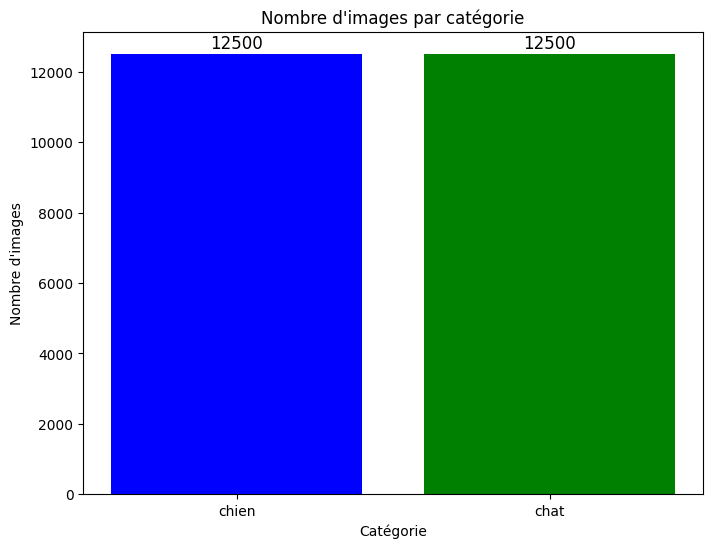

In [52]:
plt.figure(figsize=(8, 6))
couleurs = ['blue', 'green']  # Couleurs compréhensibles
plt.bar(noms_categories, compte_categories, color=couleurs)
plt.xlabel('Catégorie')
plt.ylabel('Nombre d\'images')
plt.title('Nombre d\'images par catégorie')
for i, v in enumerate(compte_categories):
    plt.text(i, v + 50, str(v), ha='center', va='bottom', fontsize=12, color='black')

In [53]:
# Sélectionner une image aléatoire
# Sélectionner une image aléatoire
image_aleatoire = random.choice(noms_fichiers)


# Chemin complet de l'image sélectionnée
img_path = os.path.join(train_dir, image_aleatoire)
img_path

'/content/drive/MyDrive/dogs-vs-cats/train/cat.2773.jpg'

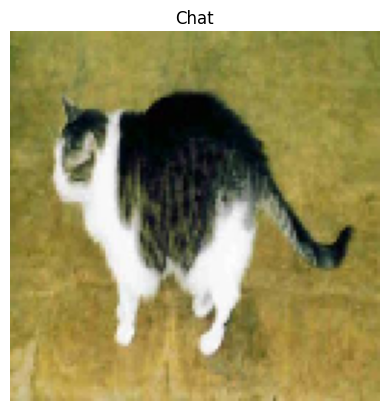

In [55]:
# Charger et afficher l'image
img = image.load_img(img_path, target_size=(128, 128))
plt.imshow(img)
categorie = 'Chien' if 'dog' in image_aleatoire else 'Chat'
plt.title(categorie)
plt.axis('off')
plt.show()

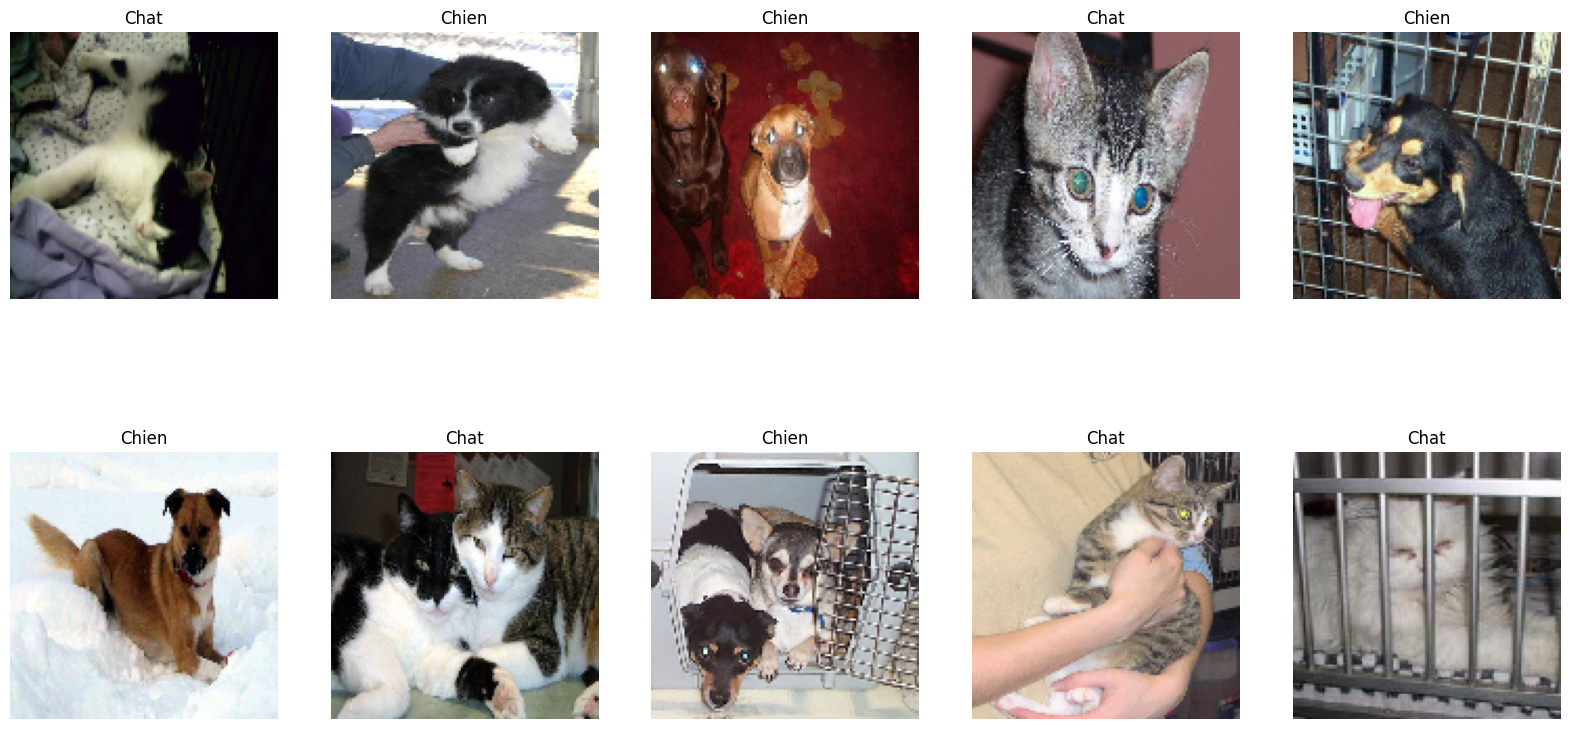

In [58]:
# Sélectionner 10 images aléatoires
random_images = df.sample(n=10)

# Afficher les 10 images aléatoires
plt.figure(figsize=(20, 10))

for i, row in enumerate(random_images.iterrows()):
    filename = row[1]['filename']
    category = 'Chien' if row[1]['categorie'] == 1 else 'Chat'
    img_path = os.path.join(train_dir, filename)
    img = image.load_img(img_path, target_size=(128, 128))
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.title(category)
    plt.axis('off')

plt.show()